In [1]:
import pdr
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
import numpy as np


In [63]:
image_fd = pdr.read('../test_data/e23456/e23456-fd-ffull-b00-image-r.fits')
image_nd = pdr.read('../test_data/e23456/e23456-nd-ffull-b00-image-r.fits')
image_nd.keys()

['PRIMARY', 'CNT', 'FLAG', 'COVERAGE', 'DOSE']

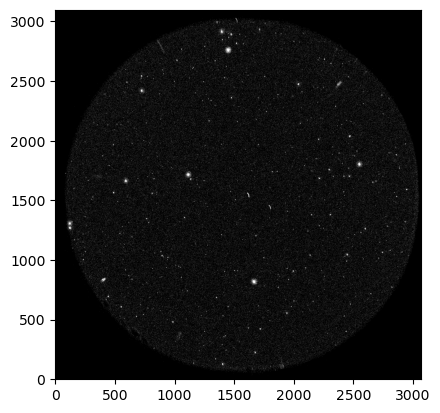

In [31]:
# | label: test_bullshit
plt.imshow(ZScaleInterval()(cnt_nd_masked), cmap="binary_r", origin="lower")

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(ZScaleInterval()(image_fd['DOSE']), cmap="binary_r", origin="lower")
axes[0].set_title('FUV Dose Backplane')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(ZScaleInterval()(image_nd['DOSE']), cmap="binary_r", origin="lower")
axes[1].set_title('NUV Dose Backplane')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.savefig('figures/dose_maps.png', dpi=300)

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(ZScaleInterval()(image_fd['CNT']), cmap="binary_r", origin="lower")
axes[0].set_title('FUV Count Backplane')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(ZScaleInterval()(image_nd['CNT']), cmap="binary_r", origin="lower")
axes[1].set_title('NUV Count Backplane')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.savefig('figures/cnt_images.png', dpi=300)

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(ZScaleInterval()(image_fd['FLAG']), cmap="binary_r", origin="lower")
axes[0].set_title('FUV Flag Backplane')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(ZScaleInterval()(image_nd['FLAG']), cmap="binary_r", origin="lower")
axes[1].set_title('NUV Flag Backplane')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.savefig('figures/flag_backplanes.png', dpi=300)

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].imshow(ZScaleInterval()(image_fd['COVERAGE']), cmap="binary_r", origin="lower")
axes[0].set_title('FUV Coverage Backplane')
axes[0].set_xticks([])
axes[0].set_yticks([])

axes[1].imshow(ZScaleInterval()(image_nd['COVERAGE']), cmap="binary_r", origin="lower")
axes[1].set_title('NUV Coverage Backplane')
axes[1].set_xticks([])
axes[1].set_yticks([])

plt.tight_layout()
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.savefig('figures/coverage_backplanes.png', dpi=300)

In [7]:
movie_fd = pdr.read('../test_data/e23456/e23456-fd-f0120-b00-movie-r.fits')
movie_nd = pdr.read('../test_data/e23456/e23456-nd-f0120-b00-movie-r.fits')
movie_nd


pdr.Data(/Users/cm/github/glcat_documentation/pages/../test_data/e23456/e23456-nd-f0120-b00-movie-r.fits)
keys=['PRIMARY', 'CNT', 'FLAG']
not yet loaded: ('PRIMARY', 'CNT', 'FLAG')

In [8]:
len(movie_fd['CNT']),len(movie_nd['CNT'])

(15, 15)

In [56]:
from IPython.display import display, clear_output
import imageio

assert len(movie_fd['CNT']) == len(movie_nd['CNT']), "Frame counts do not match"
n_frames = len(movie_fd['CNT'])

frames = []
for i in range(n_frames):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(ZScaleInterval()(movie_fd['CNT'][i]), cmap="binary_r", origin="lower")
    axes[0].set_title(f'FUV Frame {i}')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[1].imshow(ZScaleInterval()(movie_nd['CNT'][i]), cmap="binary_r", origin="lower")
    axes[1].set_title(f'NUV Frame {i}')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    plt.tight_layout()
    fig.canvas.draw()
    # Convert to numpy array using buffer_rgba
    frame = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    # Remove alpha channel for GIF
    frame = frame[..., :3]
    frames.append(frame)
    plt.close(fig)

imageio.mimsave('figures/movie_cnt.gif', frames, duration=0.5, loop=0)

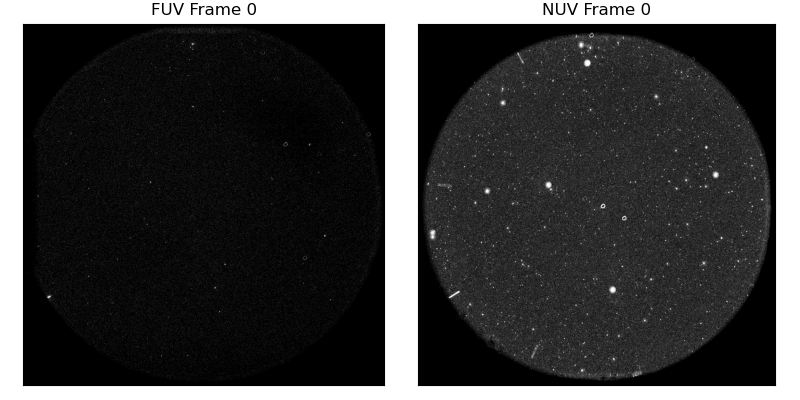

In [57]:
from IPython.display import Image

display(Image(filename='figures/movie_cnt.gif'))


In [58]:
from IPython.display import display, clear_output
import imageio

assert len(movie_fd['CNT']) == len(movie_nd['CNT']), "Frame counts do not match"
n_frames = len(movie_fd['CNT'])

frames = []
for i in range(n_frames):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(ZScaleInterval()(movie_fd['FLAG'][i]), cmap="binary_r", origin="lower")
    axes[0].set_title(f'FUV Flags Frame {i}')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[1].imshow(ZScaleInterval()(movie_nd['FLAG'][i]), cmap="binary_r", origin="lower")
    axes[1].set_title(f'NUV Flags Frame {i}')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    plt.tight_layout()
    fig.canvas.draw()
    # Convert to numpy array using buffer_rgba
    frame = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    # Remove alpha channel for GIF
    frame = frame[..., :3]
    frames.append(frame)
    plt.close(fig)

imageio.mimsave('figures/movie_flag.gif', frames, duration=0.5, loop=0)

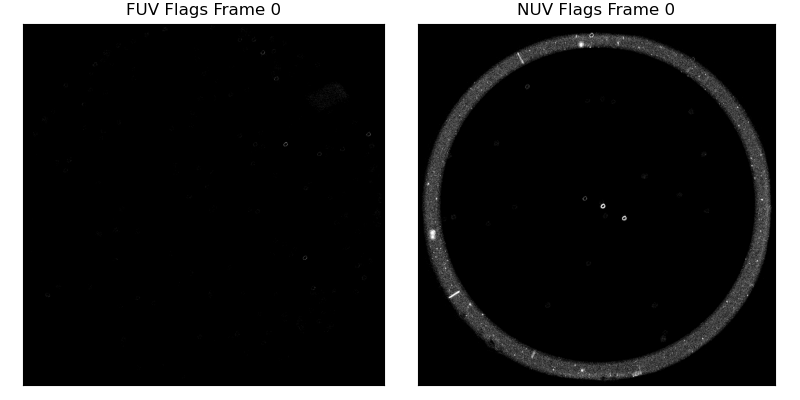

In [59]:
from IPython.display import Image

display(Image(filename='figures/movie_flag.gif'))


In [60]:
masked_frames = []
cmap = plt.get_cmap("binary_r").copy()
cmap.set_bad(color='red')  # Masked pixels will appear red

for i in range(n_frames):
    cnt_fd_masked = np.ma.masked_where(movie_fd['FLAG'][i], movie_fd['CNT'][i], copy=True)
    cnt_nd_masked = np.ma.masked_where(movie_nd['FLAG'][i], movie_nd['CNT'][i], copy=True)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(ZScaleInterval()(cnt_fd_masked), cmap=cmap, origin="lower")
    axes[0].set_title(f'FUV Frame {i}')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[1].imshow(ZScaleInterval()(cnt_nd_masked), cmap=cmap, origin="lower")
    axes[1].set_title(f'NUV Frame {i}')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    plt.tight_layout()
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    frame = frame[..., :3]
    masked_frames.append(frame)
    plt.close(fig)

imageio.mimsave('figures/movie_cnt_masked.gif', masked_frames, duration=0.5, loop=0)


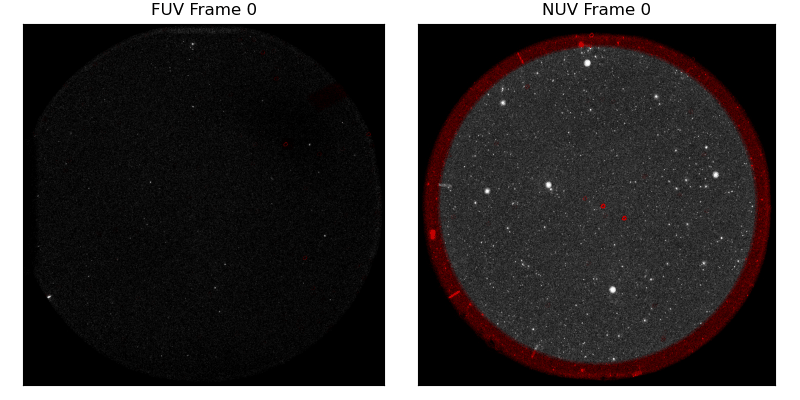

In [61]:
from IPython.display import Image

display(Image(filename='figures/movie_cnt_masked.gif'))


In [ ]:
masked_frames = []
cmap = plt.get_cmap("binary_r").copy()
cmap.set_bad(color='red')  # Masked pixels will appear red

for i in range(n_frames):
    cnt_fd_masked = np.ma.masked_where(movie_fd['FLAG'][i] & image_fd['COVERAGE'], movie_fd['CNT'][i], copy=True)
    cnt_nd_masked = np.ma.masked_where(movie_nd['FLAG'][i] & image_nd['COVERAGE'], movie_nd['CNT'][i], copy=True)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(ZScaleInterval()(cnt_fd_masked), cmap=cmap, origin="lower")
    axes[0].set_title(f'FUV Frame {i}')
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[1].imshow(ZScaleInterval()(cnt_nd_masked), cmap=cmap, origin="lower")
    axes[1].set_title(f'NUV Frame {i}')
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    plt.tight_layout()
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    frame = frame[..., :3]
    masked_frames.append(frame)
    plt.close(fig)

imageio.mimsave('figures/movie_cnt_masked_cropped.gif', masked_frames, duration=0.5, loop=0)


In [62]:
from IPython.display import Image

display(Image(filename='figures/movie_cnt_masked_cropped.gif'))


FileNotFoundError: [Errno 2] No such file or directory: 'figures/movie_cnt_masked_cropped.gif'